In [123]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [124]:

feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [133]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4        0
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1     

## DBSCAN 결과 시각화

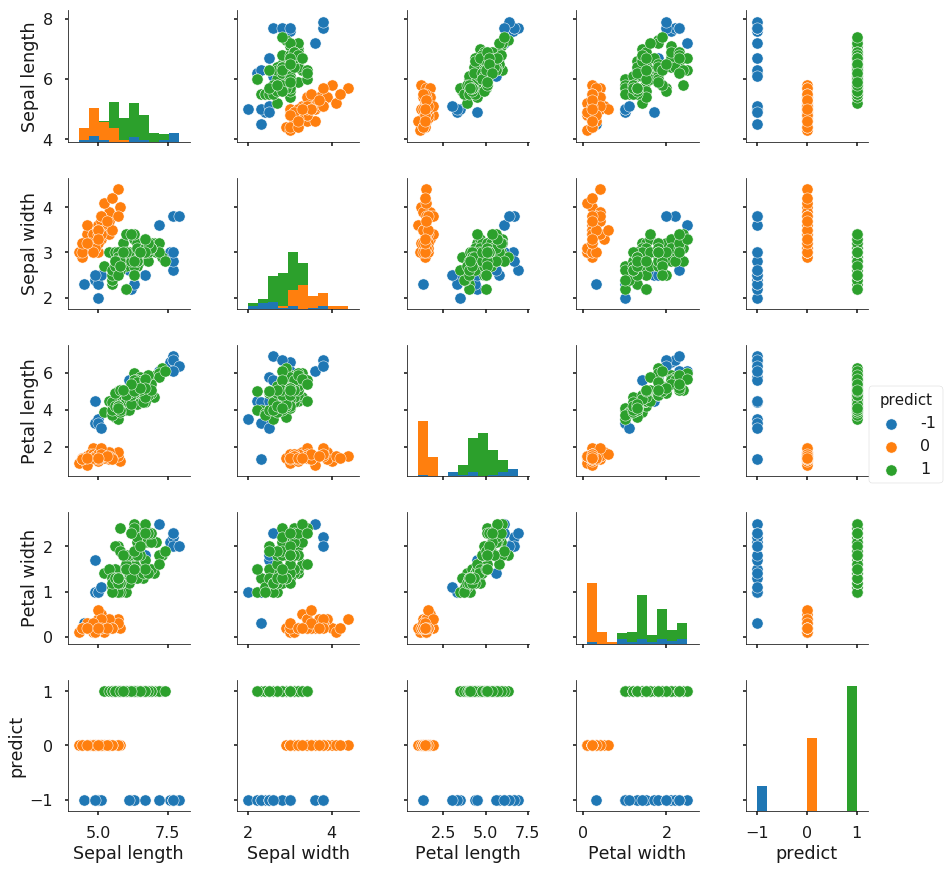

In [134]:

#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

## 실제 데이터 시각화

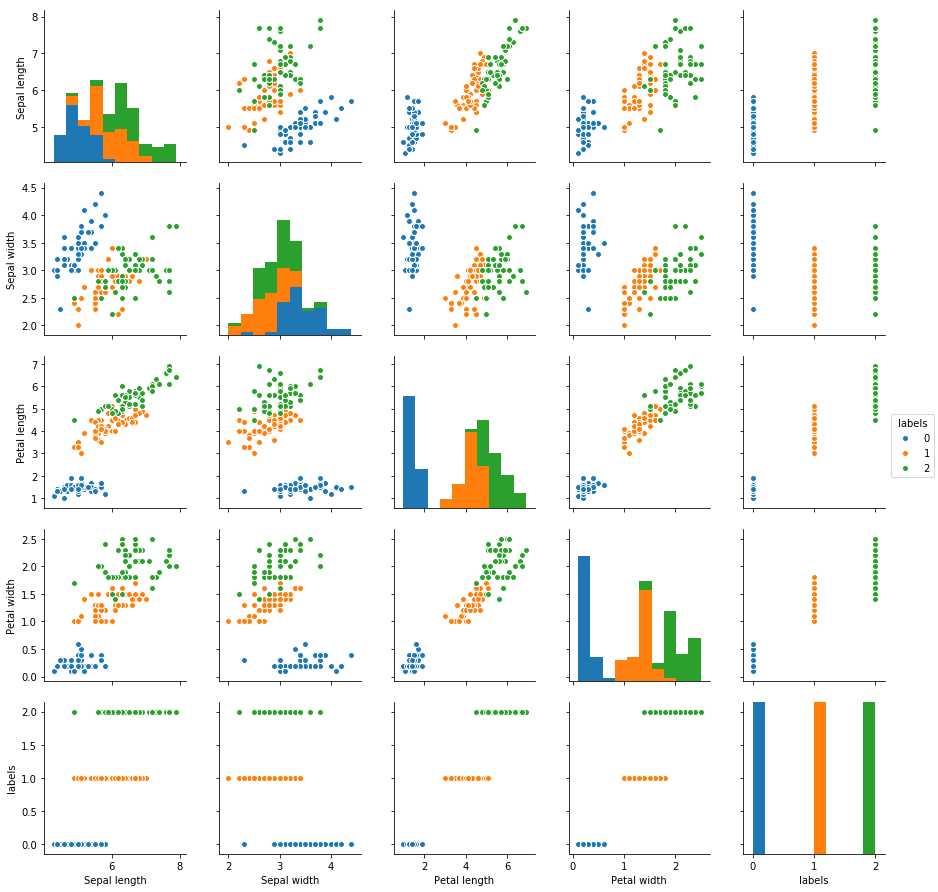

In [28]:

#pairplot with Seaborn
sns.pairplot(data,hue='labels')
plt.show()

## Kmeans 결과와 비교 

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=21, tol=0.0001, verbose=0)

In [21]:
new_labels =pd.DataFrame(km.labels_)
new_labels.columns=['predict']

In [22]:
r2 = pd.concat([feature,new_labels],axis=1)


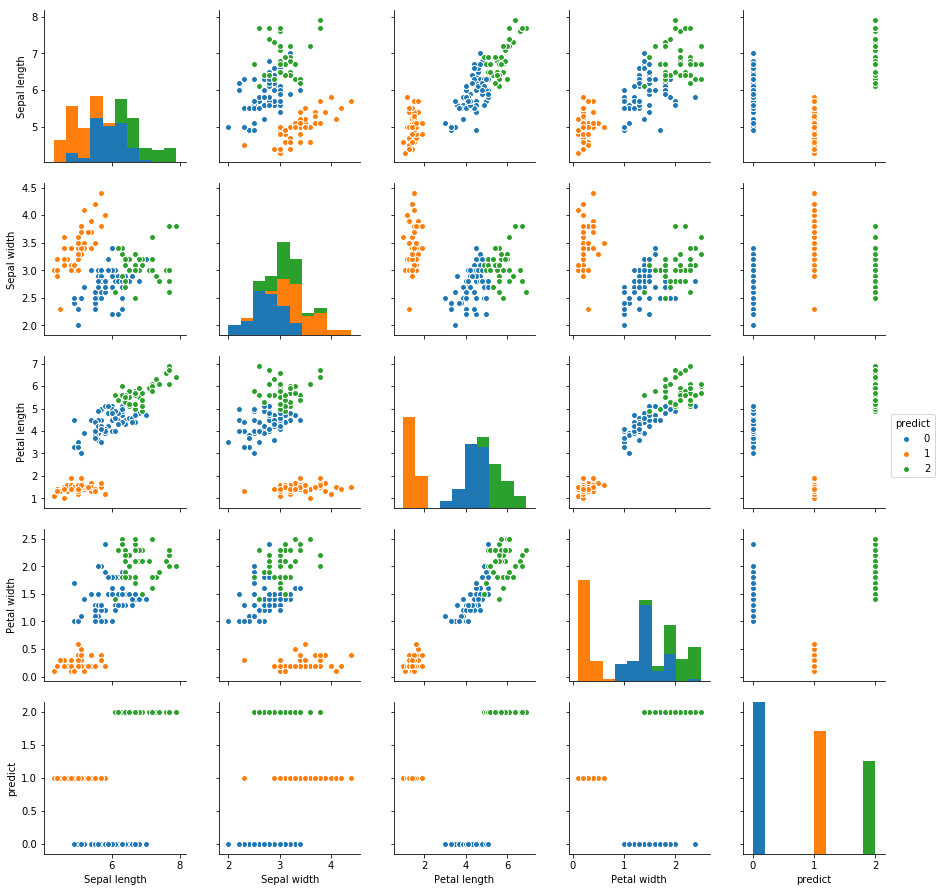

In [24]:

#pairplot with Seaborn
sns.pairplot(r2,hue='predict')
plt.show()

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [136]:
data = np.load('./data/clusterable_data.npy')

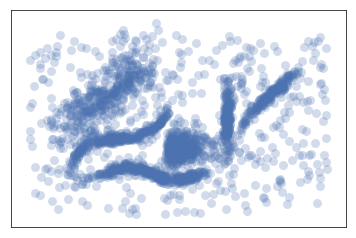

In [137]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [138]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

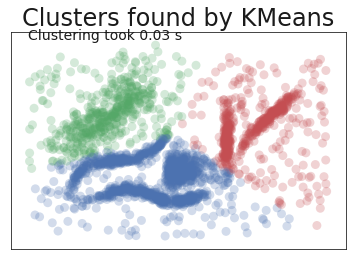

In [139]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

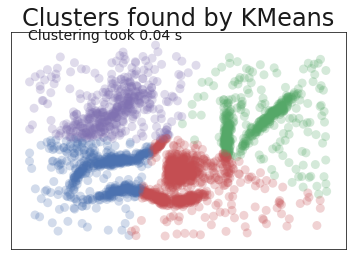

In [37]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

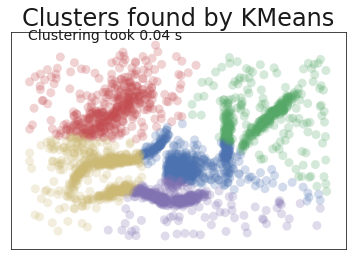

In [38]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

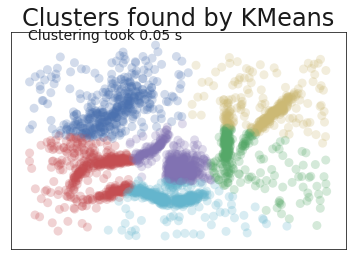

In [42]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

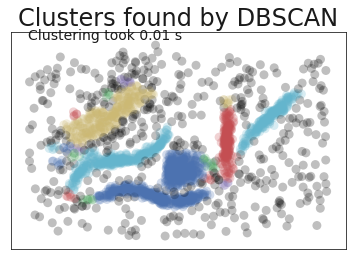

In [141]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

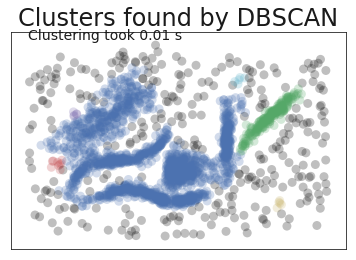

In [107]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})

In [142]:
dbs = DBSCAN(eps=0.03)
dbs2=dbs.fit(data)


In [143]:
dbs2.labels_

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

### HDBSCAN
#### DBSCAN의 발전된 버젼, 하이퍼 파라미터에 덜민감함 

In [144]:
import hdbscan

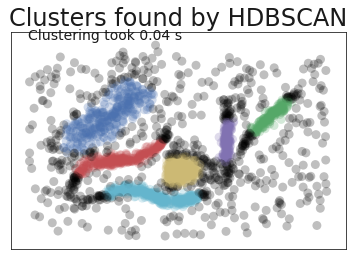

In [152]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':45})